In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# read the data of increae case
case_by_date_data= pd.read_csv("../data/increase_case_by_date.csv")
#read the data of stock index
stock_by_date_data = pd.DataFrame( pd.read_csv("../data/stock_shanghai.csv"),columns=["date","close","volume"])
#convert the format of date and  increase
case_by_date_data["date"] ="0"+ case_by_date_data["date"]+"20"
case_by_date_data["date"]
stock_by_date_data["increase"] = 'null'
case_by_date_data

,date,confirmed_cases_global,dead_cases_global,recovered_cases_global,confirmed_cases_China,dead_cases_China,recovered_cases_China
0,01/23/2020,99.0,1.0,2.0,95.0,1.0,2.0
1,01/24/2020,287.0,8.0,6.0,277.0,8.0,6.0
2,01/25/2020,493.0,16.0,3.0,486.0,16.0,3.0
3,01/26/2020,684.0,14.0,13.0,669.0,14.0,10.0
4,01/27/2020,809.0,26.0,9.0,802.0,26.0,9.0
...,...,...,...,...,...,...,...
67,03/30/2020,62248.0,3657.0,15484.0,76.0,4.0,341.0
68,03/31/2020,75122.0,4525.0,13468.0,81.0,1.0,283.0
69,04/1/2020,75118.0,4702.0,15143.0,82.0,7.0,199.0
70,04/2/2020,80552.0,6174.0,17086.0,71.0,6.0,160.0


In [3]:
# get the  increase of the data 
for i in range(0,len(stock_by_date_data)):
    if i == 0:
        stock_by_date_data['increase'][i] = 0
    else:
        
        stock_by_date_data['increase'][i] = float((stock_by_date_data['close'][i] - stock_by_date_data['close'][i-1])/stock_by_date_data['close'][i-1])

/Users/koko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/koko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [4]:
# get the recovered ratio
case_by_date_data["reovered_ratio_global"] = case_by_date_data["recovered_cases_global"]/case_by_date_data["confirmed_cases_global"]
case_by_date_data["reovered_ratio_China"] = case_by_date_data["recovered_cases_China"]/case_by_date_data["confirmed_cases_global"]




In [5]:
# summary the stock price
case_by_date_data.describe()
stock_by_date_data.describe()
stock_by_date_data

,date,close,volume,increase
0,2020-02-03,2746.6050,21591210240,0
1,2020-02-04,2783.2870,36404620032,0.0133554
2,2020-02-05,2818.0870,30976182272,0.0125032
3,2020-02-06,2866.5090,31639214336,0.0171826
4,2020-02-07,2875.9630,30947964160,0.00329809
5,2020-02-10,2890.4870,29492978432,0.00505013
6,2020-02-11,2901.6740,26916833536,0.00387028
7,2020-02-12,2926.8990,24873342976,0.00869326
8,2020-02-13,2906.0730,27480484352,-0.00711538
9,2020-02-14,2917.0070,25065062656,0.00376247


In [6]:
# convert to datetime
stock_by_date_data["date"] = pd.to_datetime(stock_by_date_data["date"],format="%Y-%m-%d")
case_by_date_data["date"] = pd.to_datetime(case_by_date_data["date"],format="%m/%d/%Y")


In [7]:
# convert the data type of increase from object to float
stock_by_date_data["increase"] = stock_by_date_data.increase.astype(float)

In [8]:
# create a new table 
merged_data = pd.merge(stock_by_date_data,case_by_date_data,on="date")
# normalize the data
merged_data_norm=merged_data.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))


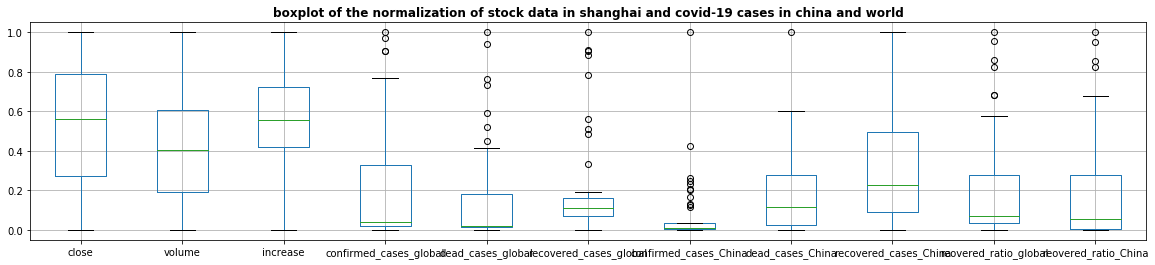

,date,close,volume,increase,confirmed_cases_global,dead_cases_global,recovered_cases_global,confirmed_cases_China,dead_cases_China,recovered_cases_China,reovered_ratio_global,reovered_ratio_China
date,1.000000,-0.485193,-0.313550,-0.213221,0.795672,0.767249,0.734284,-0.526100,-0.680662,-0.217492,-0.277204,-0.325537
close,-0.485193,1.000000,0.711772,0.185623,-0.687698,-0.611243,-0.439898,0.030356,0.391813,0.724114,0.626678,0.635046
volume,-0.313550,0.711772,1.000000,-0.086671,-0.681152,-0.646905,-0.510605,-0.144543,0.098782,0.739937,0.527167,0.536358
increase,-0.213221,0.185623,-0.086671,1.000000,-0.029626,0.005826,0.046449,0.076132,0.118970,-0.072533,0.003401,-0.000394
confirmed_cases_global,0.795672,-0.687698,-0.681152,-0.029626,1.000000,0.978170,0.897350,-0.195344,-0.447087,-0.565912,-0.419411,-0.459123
dead_cases_global,0.767249,-0.611243,-0.646905,0.005826,0.978170,1.000000,0.938303,-0.234886,-0.434747,-0.526819,-0.347935,-0.390537
recovered_cases_global,0.734284,-0.439898,-0.510605,0.046449,0.897350,0.938303,1.000000,-0.265291,-0.394357,-0.336922,-0.192456,-0.245392
confirmed_cases_China,-0.526100,0.030356,-0.144543,0.076132,-0.195344,-0.234886,-0.265291,1.000000,0.765385,-0.100039,-0.193518,-0.161135
dead_cases_China,-0.680662,0.391813,0.098782,0.118970,-0.447087,-0.434747,-0.394357,0.765385,1.000000,0.247086,0.308241,0.341855
recovered_cases_China,-0.217492,0.724114,0.739937,-0.072533,-0.565912,-0.526819,-0.336922,-0.100039,0.247086,1.000000,0.707746,0.709666


In [9]:
# create and save boxplot
fig = plt.figure(figsize=(20,4)) 
merged_data_norm.iloc[:,1:].boxplot()

plt.savefig("boxplot.jpg")
plt.title('boxplot of the normalization of stock data in shanghai and covid-19 cases in china and world',fontsize='large',fontweight='bold')
plt.show()
# get the correlation coefficient
merged_data_norm.corr()


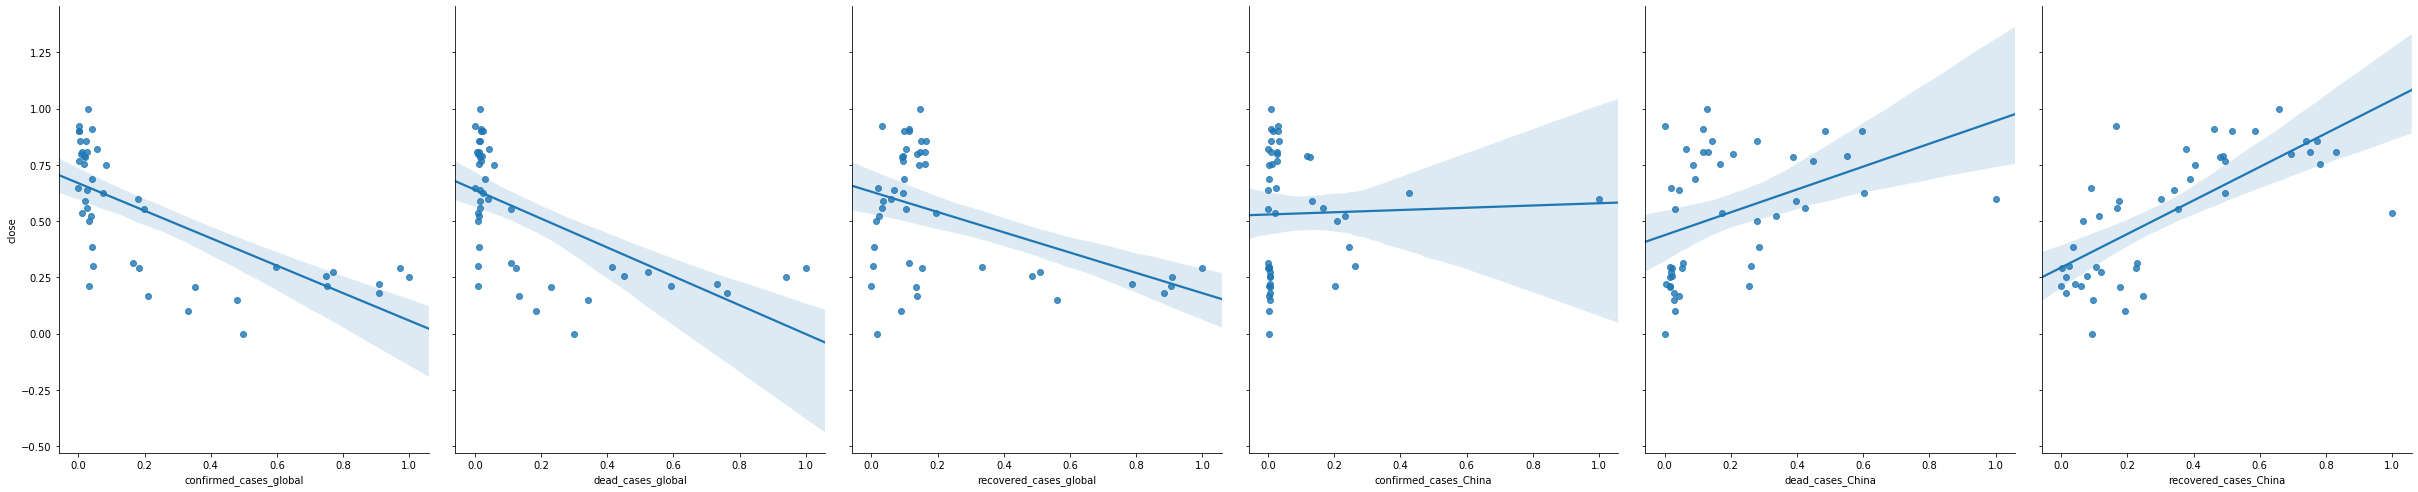

In [10]:
# create scatter plot based on the correlation coefficient
sns.pairplot(merged_data_norm, x_vars=['confirmed_cases_global','dead_cases_global','recovered_cases_global','confirmed_cases_China','dead_cases_China','recovered_cases_China'], y_vars='close', height=7, aspect=0.8,kind = 'reg')
plt.savefig("scatter plot.jpg")






In [11]:
# time series analysis
#get the len of data
len_rows = merged_data.shape[0]
# use 0.9 as train and 0.1 as test
split_point = int(len_rows * 0.9)
y_train = merged_data_norm.iloc[:split_point,[1]]
x_train = merged_data_norm.iloc[:split_point,4:-2]
y_test = merged_data_norm.iloc[split_point:,[1]]
x_test = merged_data_norm.iloc[split_point:,4:-2]


x_train

,confirmed_cases_global,dead_cases_global,recovered_cases_global,confirmed_cases_China,dead_cases_China,recovered_cases_China
0,0.032487,0.009724,0.000000,0.203306,0.253968,0.000000
1,0.043623,0.010049,0.004606,0.263140,0.261905,0.024015
2,0.040369,0.011021,0.007145,0.246083,0.285714,0.037254
3,0.033276,0.010697,0.012518,0.207339,0.277778,0.064963
4,0.038596,0.013128,0.022025,0.232198,0.337302,0.114224
5,0.026633,0.016694,0.032536,0.166215,0.424603,0.168719
6,0.019686,0.015559,0.034603,0.133620,0.396825,0.174569
7,0.000000,0.000162,0.018660,0.023934,0.019841,0.090825
8,0.178866,0.040357,0.058695,1.000000,1.000000,0.302956
9,0.074058,0.023987,0.095187,0.426579,0.603175,0.495382


In [12]:
linreg = LinearRegression()
 
model= linreg.fit(x_train,y_train)
 
a  = linreg.intercept_#intercept
 
b = linreg.coef_#Regression coefficients

b


array([[-0.41187389, -0.83624738,  0.6874775 , -0.32826609,  0.31851849,
         0.2788277 ]])

In [13]:
# validation
y_pred = linreg.predict(x_train)
y_pred


array([[0.46250405],
       [0.45039472],
       [0.46954232],
       [0.49434522],
       [0.52119137],
       [0.5950246 ],
       [0.60373853],
       [0.50634161],
       [0.47751946],
       [0.67495623],
       [0.7286462 ],
       [0.78406402],
       [0.79207395],
       [0.83779517],
       [0.52790437],
       [0.84512227],
       [0.85320476],
       [0.80446685],
       [0.82988398],
       [0.91864125],
       [0.82880763],
       [0.79926187],
       [0.8107141 ],
       [0.76751497],
       [0.67802567],
       [0.63248054],
       [0.60673269],
       [0.62768051],
       [0.60222367],
       [0.47586722],
       [0.46712707],
       [0.47423016],
       [0.44824594],
       [0.30490691],
       [0.27684875],
       [0.05165409],
       [0.40571628],
       [0.13986015],
       [0.14530238],
       [0.10342045]])

In [14]:
# calculate RMSE 
sum_mean=0
for i in range(len(y_pred)):
        sum_mean+=(y_pred[i]-y_train.values[i])**2
sum_erro=np.sqrt(sum_mean/len(y_pred))  

sum_erro

array([0.15372403])

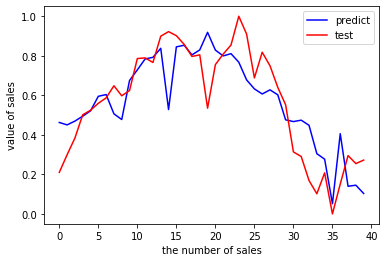

In [15]:
#ROC graph

plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_train)),y_train,'r',label="test")
plt.legend(loc="upper right") 
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()

In [16]:
# do the same thing to other attributes
# time series analysis
#get the len of data
len_rows = merged_data.shape[0]
# use 0.9 as train and 0.1 as test
split_point = int(len_rows * 0.9)
y_train = merged_data_norm.iloc[:split_point,[1]]
x_train = merged_data_norm.iloc[:split_point,[4,5,7,8,10,11]]
y_test = merged_data_norm.iloc[split_point:,[1]]
x_test = merged_data_norm.iloc[split_point:,[4,5,6,7,8,10]]
linreg = LinearRegression()
 
model= linreg.fit(x_train,y_train)
 
a  = linreg.intercept_#intercept
 
b = linreg.coef_#Regression coefficients

b

array([[ 0.59041438, -2.12784269, -0.35532227,  0.41667434,  6.65581959,
        -6.349778  ]])

In [17]:
# get the date data
merged_data_norm["date"]= merged_data["date"]
merged_data_norm.set_index("date",inplace=True)

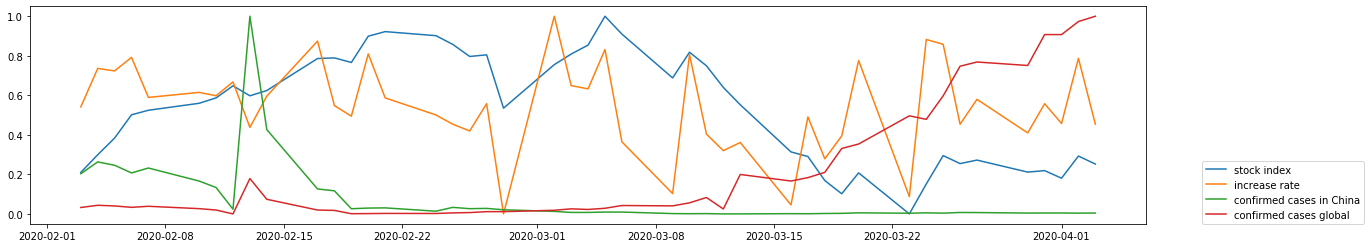

In [18]:
#Draw a line chart
fig = plt.figure(figsize=(20,4)) 
plt.plot(merged_data_norm["close"],label="stock index")
plt.plot(merged_data_norm["increase"],label="increase rate")
plt.plot(merged_data_norm["confirmed_cases_China"],label="confirmed cases in China")
plt.plot(merged_data_norm["confirmed_cases_global"],label="confirmed cases global")
plt.legend(bbox_to_anchor=(1.05,0), loc=3, borderaxespad=0)
plt.show()